In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [02:05<00:00, 23.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import glob as gb
import cv2



In [3]:
train='/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'


In [21]:
size=224
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size,size),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset='training'
)

Found 63282 images belonging to 38 classes.


In [22]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

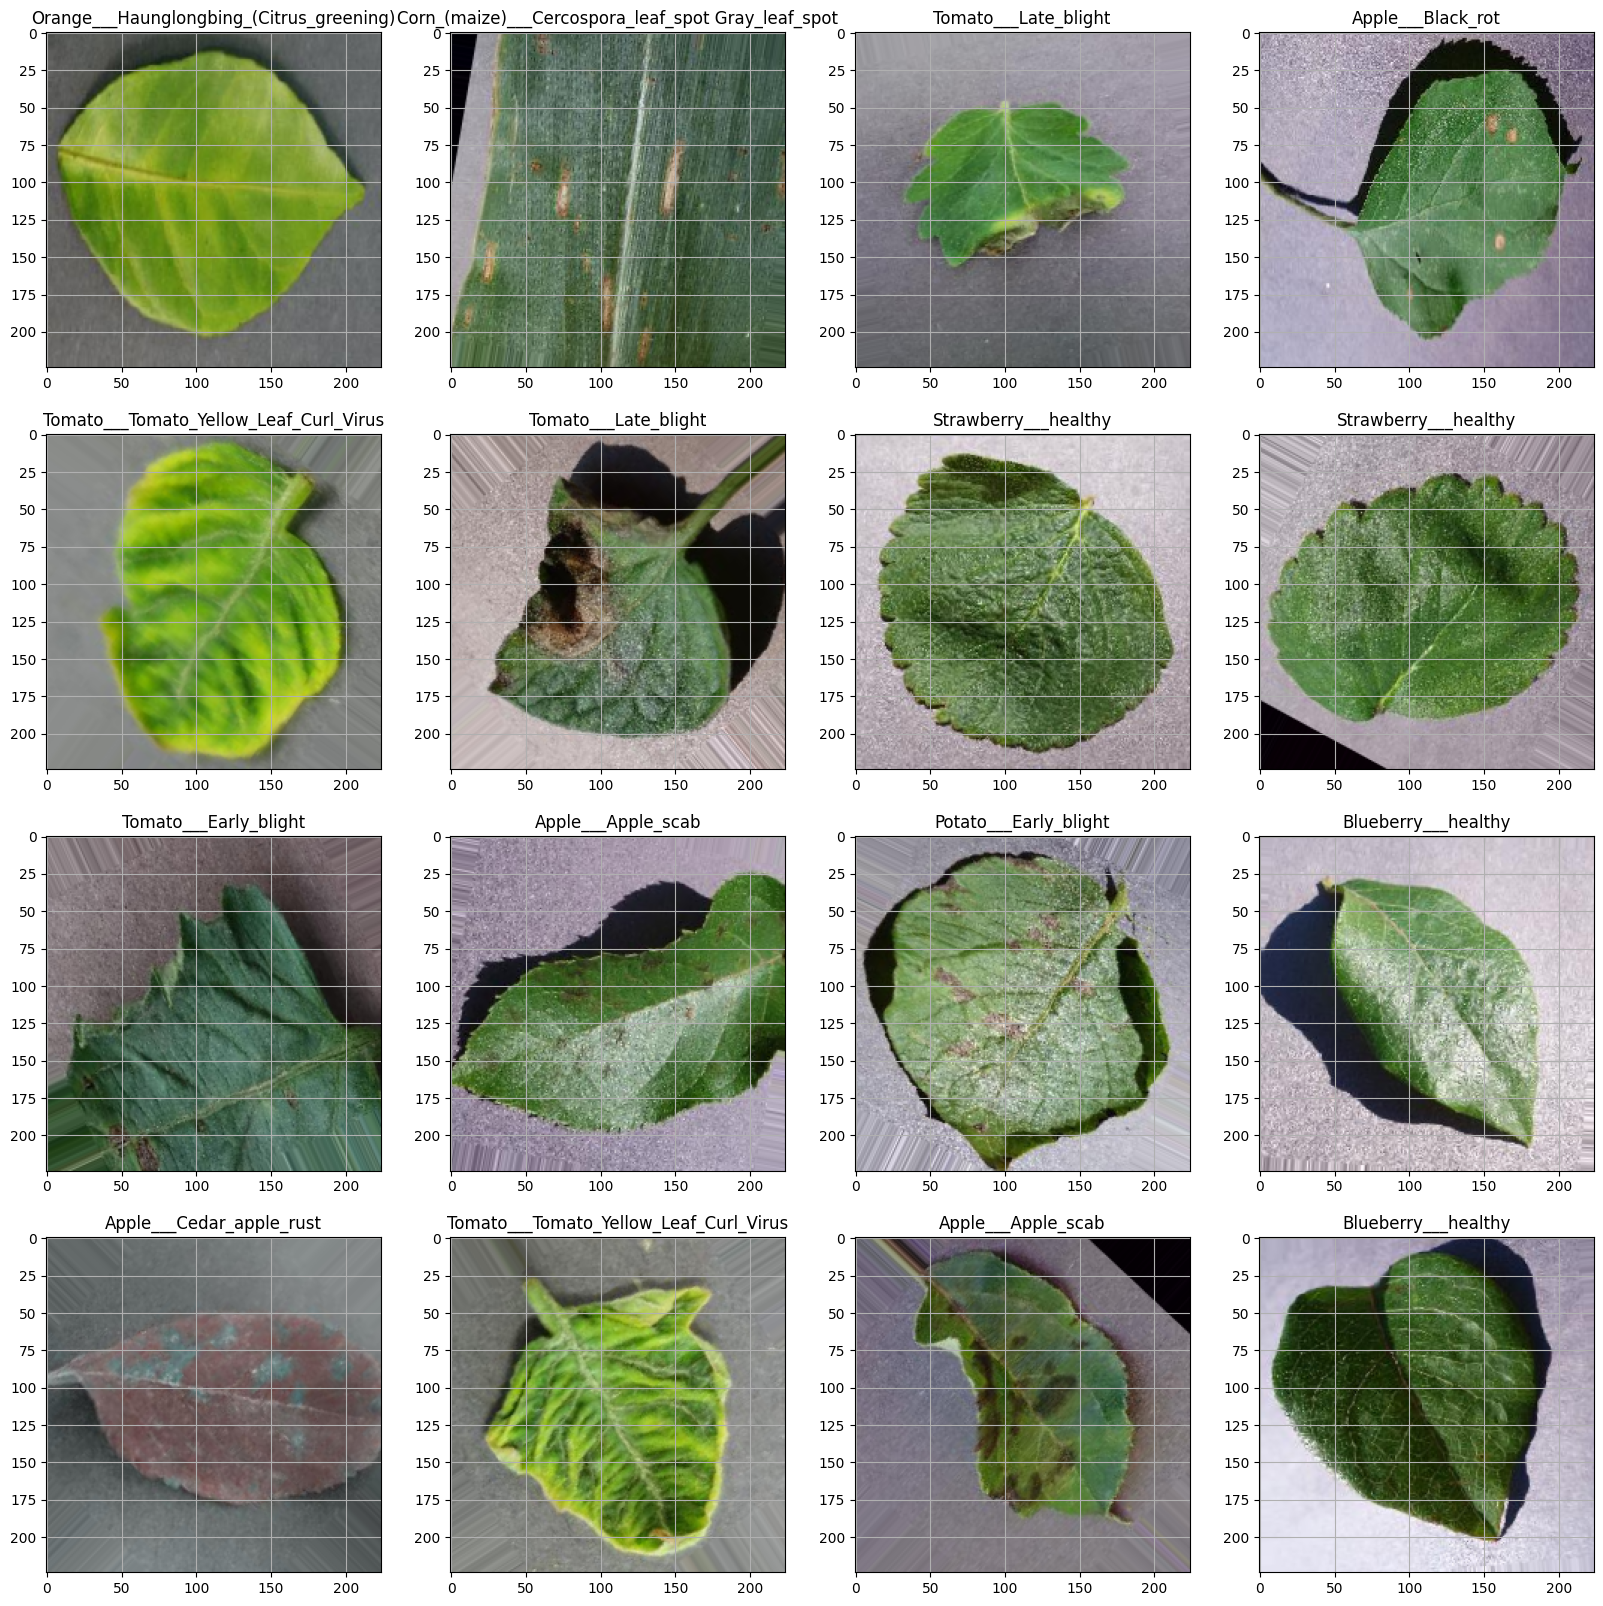

In [23]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch,y_batch in train_generator:
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.argmax(y_batch[i])])
        plt.grid(None)
    plt.show()
    break

In [25]:
valid='/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [26]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    valid,
    batch_size=164,
    target_size=(size,size),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    subset='validation'
)


Found 7013 images belonging to 38 classes.


In [27]:
test='/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    preprocessing_function=None
).flow_from_directory(
    test,
    batch_size=164,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle= False
)

Found 17572 images belonging to 38 classes.


In [28]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [29]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1, padding='same',
                              activation='relu', name="Conv1", input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='same',
                              activation='relu', name='Conv2'))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same',
                              activation='relu', name='Conv3'))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same',
                              activation='relu', name='Conv4'))

model.add(keras.layers.Flatten(name='Flatten1'))

model.add(keras.layers.Dense(128, activation='relu', name='Dense1'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation='relu', name='Dense2'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation='softmax', name='Output'))

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras',  monitor='val_loss', save_best_only=True)
model_ReduceLRonPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)
callbacks = [early_stopping, model_checkpoint, model_ReduceLRonPlateau]

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])


In [33]:
history = model.fit(train_generator, epochs=5, validation_data=valid_generator, callbacks=callbacks)


Epoch 1/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 884s 894ms/step - accuracy: 0.2844 - loss: 2.5162 - precision: 0.7162 - recall: 0.1186 - val_accuracy: 0.5728 - val_loss: 1.3842 - val_precision: 0.7554 - val_recall: 0.4030 - learning_rate: 0.0010
Epoch 2/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 911s 883ms/step - accuracy: 0.6719 - loss: 1.0570 - precision: 0.8044 - recall: 0.5552 - val_accuracy: 0.7643 - val_loss: 0.7466 - val_precision: 0.8374 - val_recall: 0.7013 - learning_rate: 0.0010
Epoch 3/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 862s 871ms/step - accuracy: 0.8060 - loss: 0.6063 - precision: 0.8657 - recall: 0.7583 - val_accuracy: 0.8508 - val_loss: 0.4708 - val_precision: 0.8869 - val_recall: 0.8198 - learning_rate: 0.0010
Epoch 4/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 953s 903ms/step - accuracy: 0.8648 - loss: 0.4161 - precision: 0.8991 - recall: 0.8367 - val_accuracy: 0.8792 - val_loss: 0.3755 - val_precision: 0.9109 - val_recall: 0.8554 - learning_rate: 0.0010
Epoch 5/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 849s 859ms/st

In [34]:
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

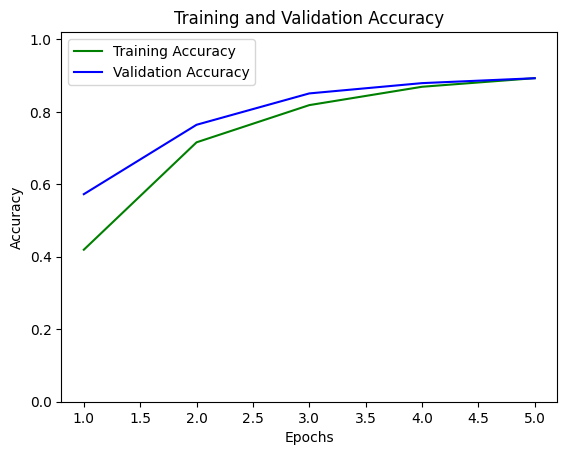

In [35]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1.02)
plt.show()

In [36]:
model_evaluate = model.evaluate(test_generator)
print("loss:", model_evaluate[0])
print("accuracy:", model_evaluate[1])
print("precision:", model_evaluate[2])
print("recall:", model_evaluate[3])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 44s 408ms/step - accuracy: 0.8986 - loss: 0.3104 - precision: 0.9122 - recall: 0.8843
loss: 0.3148958384990692
accuracy: 0.8961415886878967
precision: 0.9134740233421326
recall: 0.8819712996482849


In [37]:
# save the model
model.save('cnn_model.keras')